# The spark foundation Internship Data Science and Business Analytics


# Author :- Rutik Parmar


# Task 1: Prediction using Supervised ML on the no of Study Hours.

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Reading Data from the url

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

# exploring data

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


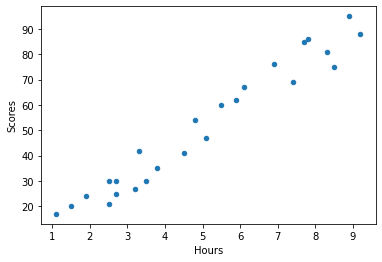

In [6]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [7]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# performing simple linear regression

In [8]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


# Distribution

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


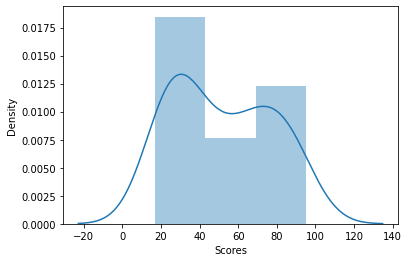

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


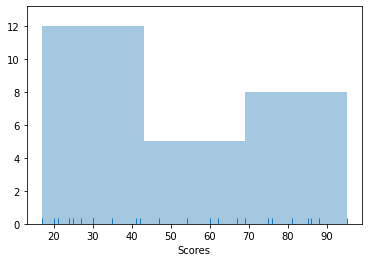

In [9]:
sns.distplot(data['Scores'])
plt.show()

sns.distplot(data['Scores'],kde=False,rug=True)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

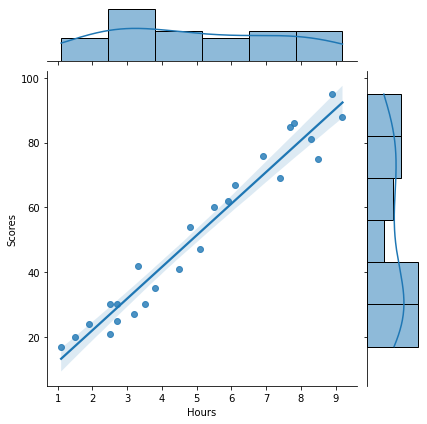

In [10]:
sns.jointplot(data['Hours'],data['Scores'],kind='reg').annotate(stats.pearsonr)
plt.show()

In [ ]:
mean_x = np.mean(data['Hours'])
mean_y = np.mean(data['Scores'])
num = 0
den = 0
x = list(data['Hours'])
y = list(data['Scores'])
for i in range(len(data)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1  = num/den

In [ ]:
B1

In [ ]:
B0  = mean_y - B1*mean_x

In [ ]:
B0

# Making prediction

In [ ]:
data['predicted_Scores'] = B0 + B1*data['Hours']

In [ ]:
data.head()

In [ ]:
plt.scatter(data['Hours'],data['Scores'])
plt.scatter(data['Hours'],data['predicted_Scores'])
plt.show()

# Prediction of the given value 9.25

In [ ]:
B0 + B1*9.25

In [ ]:
y = list(data['Scores'].values)
y_pred = list(data['predicted_Scores'].values)

# RMSE 

In [ ]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(data))])
rmse = (np.sqrt(s/len(data)))/mean_y

In [ ]:
rmse

# OLS model

In [14]:
model = smf.ols('Scores ~ Hours', data = data)
model = model.fit()

In [15]:
data['pred_ols'] = model.predict(data['Hours'])

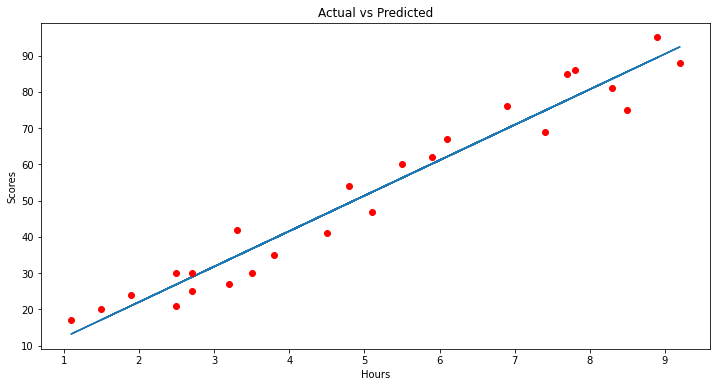

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data['Hours'], data['pred_ols'])             #regression line
plt.plot(data['Hours'], data['Scores'], 'ro')           # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Additional conclusions: Categorial Prediction

In [19]:
# consider a threashold to come to a conclusion whether the student passed or not
# consider the 40 as cut-off to pass.

cut_off = 40

In [20]:
data['Passed?'] = data['Scores']>=40

In [21]:
data.head()

,Hours,Scores,pred_ols,Passed?
0,2.5,21,26.923182,False
1,5.1,47,52.340271,True
2,3.2,27,33.766244,False
3,8.5,75,85.578002,True
4,3.5,30,36.698985,False


# Plotting the given data's Results

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passed?', ylabel='count'>

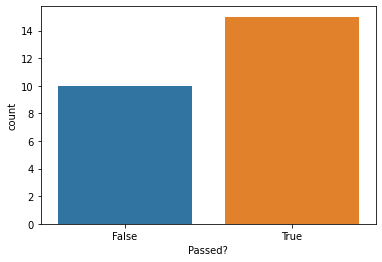

In [25]:
sns.countplot(data['Passed?'])


# Feature Engineering

In [26]:
feature = data['Hours'].values.reshape(-1,1)
target = data['Passed?'].values

# Splitting the data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=0)

# Training the KNN Model

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Accuracy

In [33]:
knn.score(x_train, y_train)

0.9444444444444444

# Predicting the Outcomes

In [36]:
get_result = [[9.25]]

In [37]:
knn.predict(get_result)

array([ True])

In [38]:
knn.predict([[14]])

array([ True])

In [39]:
knn.predict([[3]])

array([False])